A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements. For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm


1.Business Problem

1.1 Business Objective

The objective is to automate the classification of glass types in a manufacturing plant. The company wants to categorize glass materials based on various chemical properties (e.g., Na, Mg, Al, Si, etc.) to streamline the production process and meet customer specifications efficiently. This will reduce the manual workload and improve accuracy in meeting product requirements.

1.2 Constraints

Accuracy: The classification model should achieve high accuracy to ensure that the glass types are identified correctly, as incorrect classifications could lead to product defects or unmet customer expectations.

Data Quality: The model's performance will depend on the quality of the input data (chemical properties).

Computational Efficiency: Since the KNN algorithm involves computing the distance for each data point, the process could be computationally intensive for larger datasets.

Scalability: The model should scale well if the dataset grows or if new glass types or features are introduced

In [8]:
#Import require Libraries
import pandas as pd 
import numpy as np 
#Import the DataSet
df=pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [9]:
#Selects 100 rows from the DataFrame
df.sample(100)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
...,...,...,...,...,...,...,...,...,...,...
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6


In [10]:
#Now will check shape of the data
df.shape

(214, 10)

In [11]:
#Will get the summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [14]:
#data Dictionary 
"""
Ri=Continous
Ni=Continous
Mi=Continous
Al=Continous
Si=Continous
K=Continous
Ba=Continous
Fe=Continous
Type=Discrete
"""

'\nRi=Continous\nNi=Continous\nMi=Continous\nAl=Continous\nSi=Continous\nK=Continous\nBa=Continous\nFe=Continous\nType=Discrete\n'

## Data Preprocessing :

In [18]:
#Data Preprocessing
#first we will check the datatype
df.dtypes 
#Here we can see all the values are of numerical type

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [19]:
#Check the null values
df.isna().sum() 
#from ouput we can see that there are zero null values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Axes: >

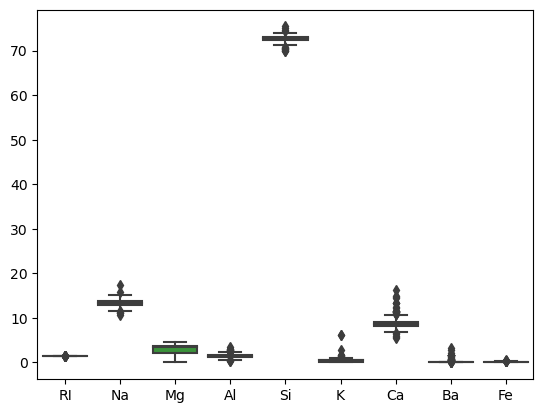

In [21]:
#checking the outliers
import seaborn as sns
sns.boxplot(df[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]])

(<Axes: >, (214, 10))

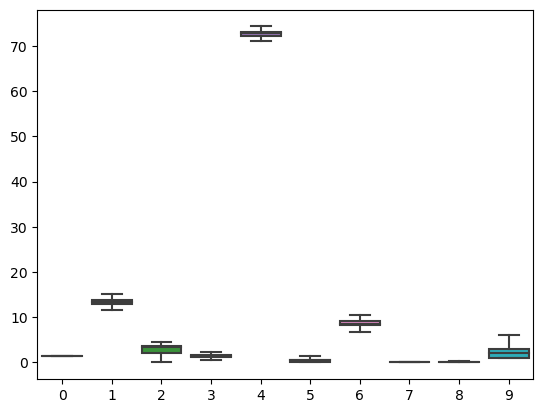

In [24]:
#Now outlier Treatment using replacement technique

IQR=df.quantile(0.75)-df.quantile(0.25)
IQR
lower_limit=df.quantile(0.25)-1.5*IQR
upper_limit=df.quantile(0.75)+1.5*IQR
IQR,lower_limit,upper_limit

df_replaced=pd.DataFrame(np.where(df>upper_limit,upper_limit,np.where(df<lower_limit,lower_limit,df)))
sns.boxplot(df_replaced),df_replaced.shape
#now from boxplot we can see that outliers has been removed

## EDA

In [26]:
#summary of the numerical columns in a DataFrame. 
df_replaced.describe() #by this we came to know min ,max,std,mean 25%,75%,50%

,0,1,2,3,4,5,6,7,8,9
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.0,214.000000,214.000000
mean,1.518165,13.405181,2.684533,1.420794,72.668949,0.440789,8.796741,0.0,0.052850,2.644860
std,0.002374,0.742792,1.442408,0.424339,0.658469,0.306640,0.873799,0.0,0.085568,1.842392
min,1.512570,11.531250,0.000000,0.530000,71.068750,0.000000,6.841250,0.0,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.0,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.0,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.0,0.100000,3.000000
max,1.523110,15.201250,4.490000,2.290000,74.298750,1.341250,10.571250,0.0,0.250000,6.000000


(array([ 15., 156.,  35.,   6.,   2.]),
 array([1.51115 , 1.515706, 1.520262, 1.524818, 1.529374, 1.53393 ]),
 <BarContainer object of 5 artists>)

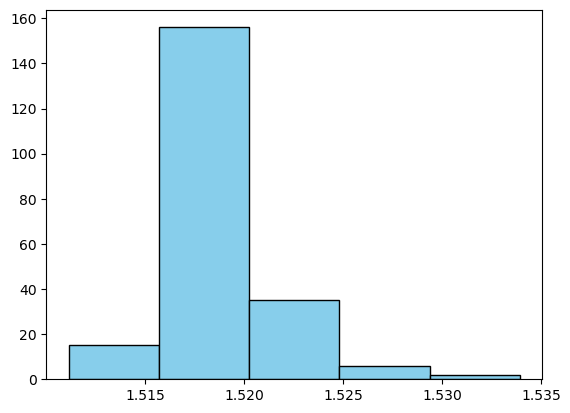

In [28]:
#Univariate Analysis
import matplotlib.pyplot as plt
plt.hist(df['RI'], bins=5, color='skyblue', edgecolor='black')

In [31]:
#Model Building
#First we will go for normalizing the data 
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
norm_data=norm_func(df_replaced.iloc[:,:9])
norm_data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(df_replaced.iloc[:,:9])
X

array([[ 1.20149683,  0.31687123,  1.25463857, ..., -0.05361671,
         0.        , -0.61909102],
       [-0.23426899,  0.65422823,  0.63616803, ..., -1.10895863,
         0.        , -0.61909102],
       [-0.83813521,  0.16843415,  0.60142249, ..., -1.16631417,
         0.        , -0.61909102],
       ...,
       [ 1.04947457,  1.28845939, -1.86551055, ..., -0.40922105,
         0.        , -0.61909102],
       [-0.69878146,  1.31544795, -1.86551055, ..., -0.36333662,
         0.        , -0.61909102],
       [-0.44541102,  1.11303375, -1.86551055, ..., -0.20274111,
         0.        , -0.61909102]])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6304\2266734023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na'],hist=False)


<Axes: xlabel='Na', ylabel='Density'>

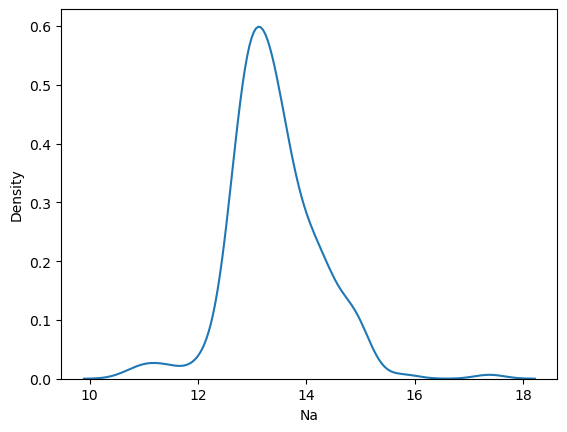

In [18]:
sns.distplot(df['Na'],hist=False)

In [32]:
#Check the null values
norm_data.isna().sum() 

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7    214
8      0
dtype: int64

In [36]:
#after Normalizing we can see 7th column became nan also there the importance of that feature less it contains maximum of the 0 values
#So we will drop that column
#norm_data.drop(norm_data.columns[7],axis=1,inplace=True) 

In [35]:
#Let us now apply x as input and y as output
#X=np.array(norm_data.iloc[:,:])
##Since is wbcd norm we are alredy excluding output column ,hence all rows and 
y=np.array(df['Type'])

In [38]:
#Now we will split the data into training and testing state
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [39]:
#Now we will apply model
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
pred

array([1, 2, 1, 2, 2, 2, 1, 2, 1, 3, 5, 1, 1, 2, 1, 2, 2, 3, 2, 6, 7, 7,
       3, 1, 2, 3, 1, 2, 2, 7, 1, 1, 1, 2, 5, 3, 3, 7, 1, 1, 2, 1, 2],
      dtype=int64)

In [40]:
#Now we will wvaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test)) 
pd.crosstab(pred,y_test)

0.627906976744186


col_0,1,2,3,5,6,7
row_0,,,,,,
1,10,4,1,0,0,0
2,2,10,1,1,1,0
3,5,0,1,0,0,0
5,0,0,0,1,0,1
6,0,0,0,0,1,0
7,0,0,0,0,0,4


In [41]:
#let us try to select correct value of k
acc=[]
#Running KNN algorithm for k=3 to 50 in steps of 2
for i in range(3,50,2):
    neigh=KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    pred=neigh.predict(X_test)
    train_acc=np.mean(neigh.predict(X_train)==y_train)
    test_acc=np.mean(neigh.predict(X_test)==y_test)
    acc.append([train_acc,test_acc])

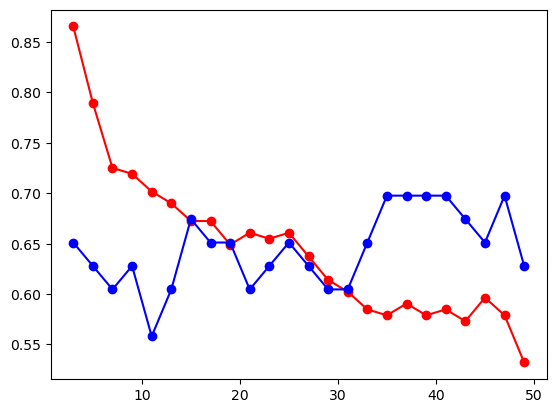

In [42]:
import matplotlib.pyplot as plt
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")